<a href="https://colab.research.google.com/github/DARSHITA2804/DEEPLEARNING/blob/main/lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install torch torchvision matplotlib tqdm



Device: cpu


Epoch 20/20: 100%|██████████| 938/938 [00:44<00:00, 21.15it/s]


100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


Epoch [1/10] D Loss: 0.6843, G Loss: 4.9264
Epoch [2/10] D Loss: 0.3498, G Loss: 2.2724
Epoch [3/10] D Loss: 0.3579, G Loss: 3.2501
Epoch [4/10] D Loss: 2.5385, G Loss: 1.3741
Epoch [5/10] D Loss: 0.6166, G Loss: 2.7679
Epoch [6/10] D Loss: 0.2046, G Loss: 1.8963
Epoch [7/10] D Loss: 0.0389, G Loss: 3.4507
Epoch [8/10] D Loss: 0.6460, G Loss: 5.6845
Epoch [9/10] D Loss: 0.0319, G Loss: 4.3721
Epoch [10/10] D Loss: 0.0202, G Loss: 5.0011


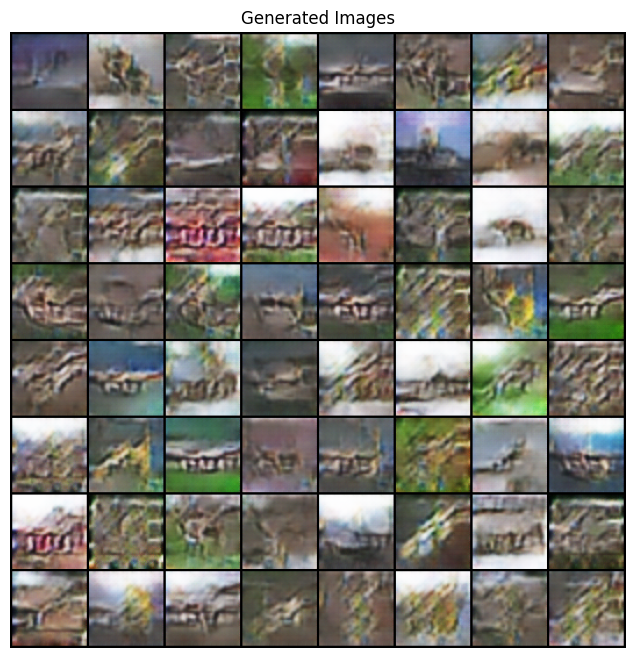

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

# 1. Hyperparameters
batch_size = 128
latent_dim = 100
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Data loading (CIFAR-10 color images)
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = datasets.CIFAR10(root='./data', download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 3. Define Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512), nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256), nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128), nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64), nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)

# 4. Define Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x).view(-1, 1)

# 5. Initialize models
netG, netD = Generator().to(device), Discriminator().to(device)
criterion = nn.BCELoss()
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))

# 6. Training loop
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Real labels = 1, Fake labels = 0
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        fake_imgs = netG(z)
        real_loss = criterion(netD(real_imgs), real_labels)
        fake_loss = criterion(netD(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizerD.zero_grad()
        d_loss.backward()
        optimizerD.step()

        # Train Generator
        g_loss = criterion(netD(fake_imgs), real_labels)
        optimizerG.zero_grad()
        g_loss.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/{epochs}] D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")

# 7. Generate samples
z = torch.randn(64, latent_dim, 1, 1, device=device)
fake_imgs = netG(z)
vutils.save_image(fake_imgs, 'dcgan_generated.png', normalize=True)
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(vutils.make_grid(fake_imgs[:64], padding=2, normalize=True).cpu(), (1,2,0)))
plt.show()



Epoch 1/10: 100%|██████████| 469/469 [05:21<00:00,  1.46it/s]


Epoch [1/10] | D Loss: 0.2675 | G Loss: 1.3297


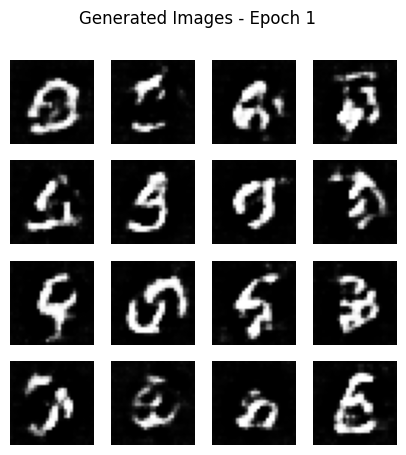

Epoch 2/10: 100%|██████████| 469/469 [05:16<00:00,  1.48it/s]


Epoch [2/10] | D Loss: 0.2787 | G Loss: 1.8825


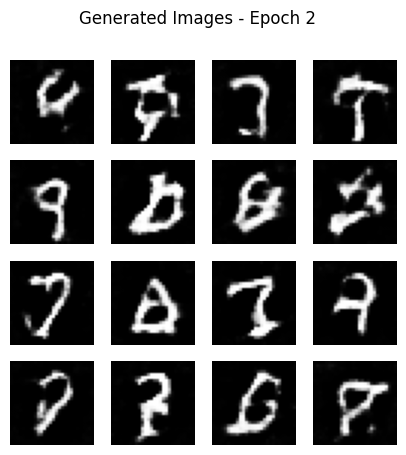

Epoch 3/10: 100%|██████████| 469/469 [05:15<00:00,  1.49it/s]


Epoch [3/10] | D Loss: 0.2546 | G Loss: 2.0490


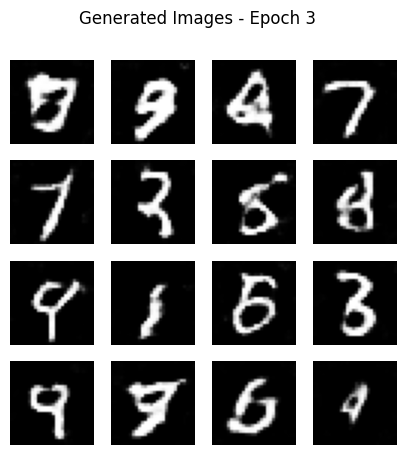

Epoch 4/10: 100%|██████████| 469/469 [05:15<00:00,  1.49it/s]


Epoch [4/10] | D Loss: 0.2278 | G Loss: 1.7879


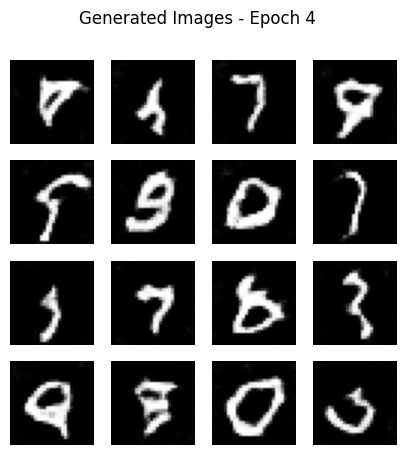

Epoch 5/10: 100%|██████████| 469/469 [05:13<00:00,  1.49it/s]


Epoch [5/10] | D Loss: 0.2840 | G Loss: 1.9890


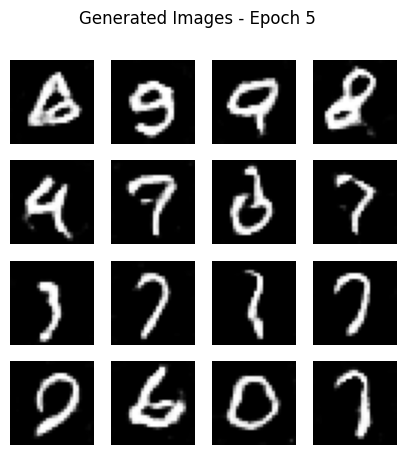

Epoch 6/10: 100%|██████████| 469/469 [05:16<00:00,  1.48it/s]


Epoch [6/10] | D Loss: 0.3462 | G Loss: 1.1048


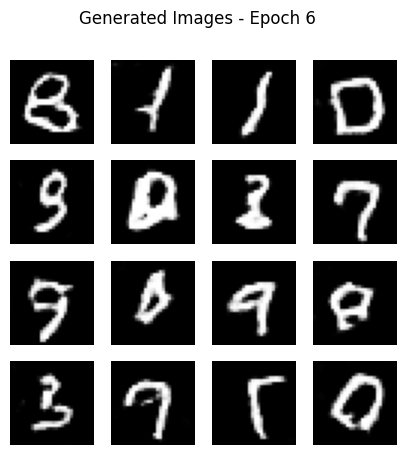

Epoch 7/10: 100%|██████████| 469/469 [05:14<00:00,  1.49it/s]


Epoch [7/10] | D Loss: 0.3175 | G Loss: 1.3139


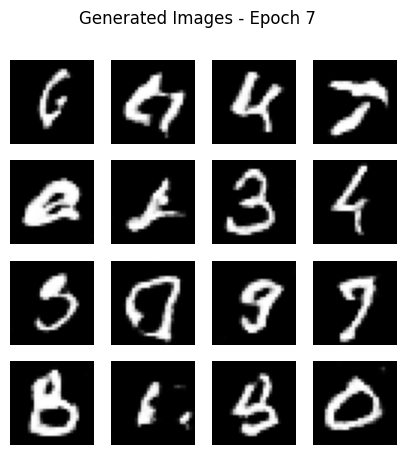

Epoch 8/10: 100%|██████████| 469/469 [05:16<00:00,  1.48it/s]


Epoch [8/10] | D Loss: 0.3072 | G Loss: 1.2928


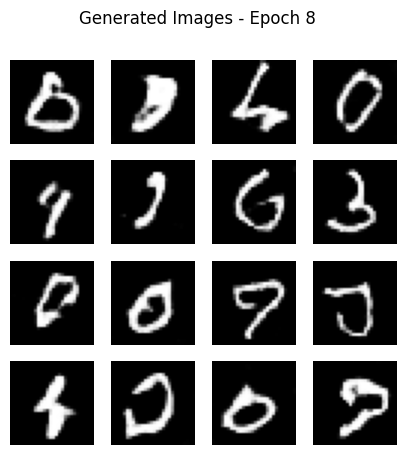

Epoch 9/10: 100%|██████████| 469/469 [05:17<00:00,  1.48it/s]


Epoch [9/10] | D Loss: 0.3088 | G Loss: 1.3881


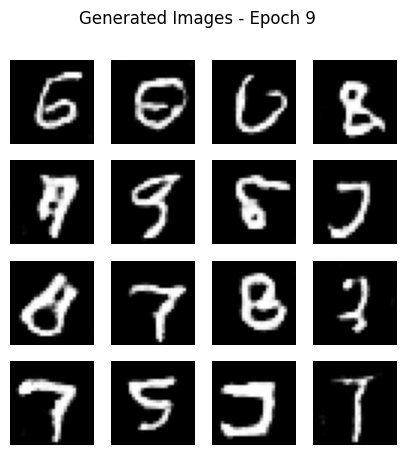

Epoch 10/10: 100%|██████████| 469/469 [05:16<00:00,  1.48it/s]


Epoch [10/10] | D Loss: 0.3695 | G Loss: 1.0922


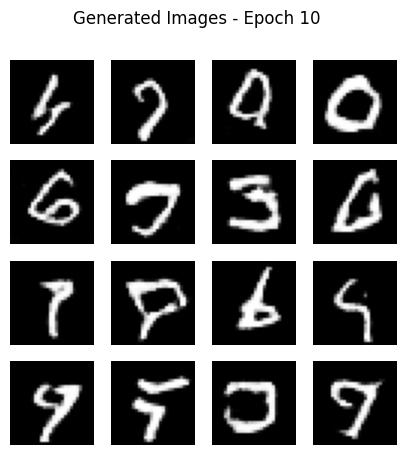

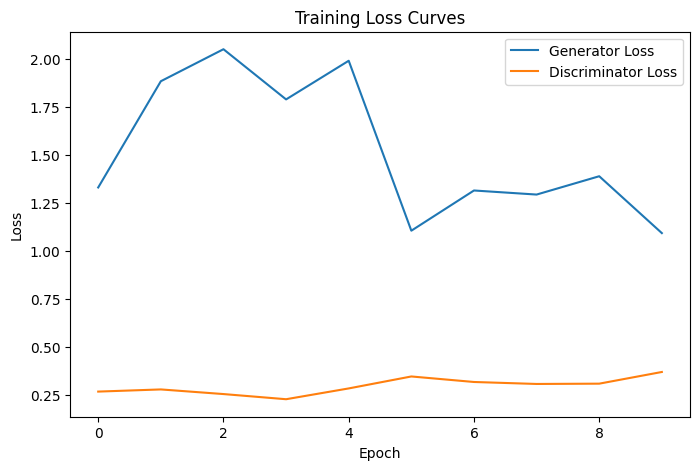

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

# ----------------------------------------------------------
# Step 3: Define Generator and Discriminator (Conv-based)
# ----------------------------------------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 128, 7, 1, 0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

# ----------------------------------------------------------
# Step 4: Setup
# ----------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 100

generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# ----------------------------------------------------------
# Step 5: Load MNIST
# ----------------------------------------------------------
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataloader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=128, shuffle=True
)

# ----------------------------------------------------------
# Step 6: Train the DCGAN
# ----------------------------------------------------------
epochs = 10
G_losses, D_losses = [], []

for epoch in range(epochs):
    for imgs, _ in tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
        imgs = imgs.to(device)
        batch_size = imgs.size(0)

        # Labels
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # ---- Train Generator ----
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim, 1, 1).to(device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), real)
        g_loss.backward()
        optimizer_G.step()

        # ---- Train Discriminator ----
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(imgs), real)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    G_losses.append(g_loss.item())
    D_losses.append(d_loss.item())
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Show generated images every epoch
    with torch.no_grad():
        z = torch.randn(16, latent_dim, 1, 1).to(device)
        fake = generator(z).cpu()
        plt.figure(figsize=(5,5))
        for i in range(16):
            plt.subplot(4,4,i+1)
            plt.imshow(fake[i][0]*0.5 + 0.5, cmap='gray')  # Denormalize
            plt.axis('off')
        plt.suptitle(f"Generated Images - Epoch {epoch+1}")
        plt.show()

# ----------------------------------------------------------
# Step 7: Plot Loss Curves
# ----------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.title("Training Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
